In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
import psi4

In [4]:
psi4.core.set_output_file('output.dat', False)
psi4.set_memory('500 MB')

500000000

In [12]:
mol = Chem.MolFromSmiles("CCCC(=O)O")
mol = AllChem.AddHs(mol)
AllChem.EmbedMultipleConfs(mol, numConfs=10)

In [13]:
elements = [atom.GetSymbol() for atom in mol.GetAtoms()]
positions = mol.GetConformer(0).GetPositions()

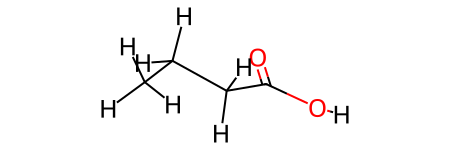

In [14]:
mol

In [15]:
psi4_geom_input = []
for elem, pos in zip(elements, positions):
    psi4_geom_input.append(f"{elem} {pos[0]} {pos[1]} {pos[2]}")
psi4_geom_input

['C -1.5506223655117521 -0.021122911150025268 0.6588685043033117',
 'C -0.8832005000554682 0.49232332960511377 -0.5728718343861838',
 'C 0.4225373434053226 -0.2299113343325302 -0.8890682714118119',
 'C 1.3747076943766658 -0.06705956130002746 0.22768011865473337',
 'O 1.1729902095648466 0.5744777290766884 1.311833107664958',
 'O 2.610160545001999 -0.640943006708751 0.14270567213373353',
 'H -0.8695737435126827 -0.5606653744044744 1.3616033506574916',
 'H -2.429504102951135 -0.6636852091226628 0.38621124385307243',
 'H -1.960897806925431 0.8383770460083901 1.228518554513175',
 'H -1.5967536014538624 0.43859955056786226 -1.4017976072638259',
 'H -0.6046893993721547 1.5657557695650626 -0.41747286532868105',
 'H 0.2837984739679355 -1.2625685600133225 -1.217823086776306',
 'H 0.8380502981336222 0.34008833980907516 -1.7689419997248716',
 'H 3.1929969553320743 -0.8036658076004021 0.9505551131112241']

In [16]:
psi4_geom_input_join = "\n".join(psi4_geom_input)
psi4_geom_input_join

'C -1.5506223655117521 -0.021122911150025268 0.6588685043033117\nC -0.8832005000554682 0.49232332960511377 -0.5728718343861838\nC 0.4225373434053226 -0.2299113343325302 -0.8890682714118119\nC 1.3747076943766658 -0.06705956130002746 0.22768011865473337\nO 1.1729902095648466 0.5744777290766884 1.311833107664958\nO 2.610160545001999 -0.640943006708751 0.14270567213373353\nH -0.8695737435126827 -0.5606653744044744 1.3616033506574916\nH -2.429504102951135 -0.6636852091226628 0.38621124385307243\nH -1.960897806925431 0.8383770460083901 1.228518554513175\nH -1.5967536014538624 0.43859955056786226 -1.4017976072638259\nH -0.6046893993721547 1.5657557695650626 -0.41747286532868105\nH 0.2837984739679355 -1.2625685600133225 -1.217823086776306\nH 0.8380502981336222 0.34008833980907516 -1.7689419997248716\nH 3.1929969553320743 -0.8036658076004021 0.9505551131112241'

In [17]:
molecule = psi4.geometry(psi4_geom_input_join)

In [18]:
opt_energy, opt_wfn, history = psi4.optimize('b3lyp/6-31g', return_wfn=True, return_history=True)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.25e-03

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 7.97e-05

	Change in internal coordinate of 5.37e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 6.17e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 5.29e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 4.
	Change in internal coordinate of 6.23e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in internal coordinate of 6.85e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 7.63e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry h

Optimizer: Optimization complete!


In [19]:
psi4.oeprop(opt_wfn, "DIPOLE")
dipole = psi4.variable("SCF DIPOLE")
dipole

array([ 0.01065421, -0.31738394, -0.44989484])

In [22]:
def get_dipole_moment(smiles, n_conf):
    results = []
    mol = Chem.MolFromSmiles(smiles)
    mol = AllChem.AddHs(mol)
    elements = [atom.GetSymbol() for atom in mol.GetAtoms()]
    conf_ids = AllChem.EmbedMultipleConfs(mol, numConfs=n_conf)
    AllChem.MMFFOptimizeMoleculeConfs(mol)
    for conf_id in conf_ids:
        result = {}
        positions = mol.GetConformer(conf_id).GetPositions()
        psi4_geom_input = []
        for elem, pos in zip(elements, positions):
            psi4_geom_input.append(f"{elem} {pos[0]} {pos[1]} {pos[2]}")
        molecule = psi4.geometry("\n".join(psi4_geom_input))
        opt_energy, opt_wfn, history = psi4.optimize('b3lyp/6-31g', return_wfn=True, return_history=True)
        psi4.oeprop(opt_wfn, "DIPOLE")
        dipole = psi4.variable("SCF DIPOLE")
        result["dipole"] = dipole
        result["energy"] = opt_energy
        result["positions"] = opt_wfn.molecule().geometry().np
        results.append(result)
    return results

results = get_dipole_moment(smiles="CC", n_conf=10)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.48e-06



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.52e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.24e-08



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.83e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.50e-06



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.49e-06



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.83e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.50e-06



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.83e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.50e-06



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.50e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.41e-08



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.50e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.45e-08



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.49e-06



Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.82e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.48e-06



Optimizer: Optimization complete!


In [23]:
results

[{'dipole': array([ 0.00000000,  0.00000000,  0.00000000]),
  'energy': -79.81275714586945,
  'positions': array([[ 1.44702977,  0.03498037, -0.09760677],
         [-1.44702977, -0.03498037,  0.09760677],
         [ 2.33326844, -0.93312496,  1.50594769],
         [ 2.15305282,  1.98306663, -0.12057412],
         [ 2.10721119, -0.89053698, -1.83012018],
         [-2.10721117,  0.89053695,  1.83012020],
         [-2.33326844,  0.93312499, -1.50594767],
         [-2.15305282, -1.98306663,  0.12057410]])},
 {'dipole': array([ 0.00000000, -0.00000000,  0.00000001]),
  'energy': -79.81275709650174,
  'positions': array([[ 1.44999910,  0.04594176,  0.00611179],
         [-1.44999910, -0.04594176, -0.00611179],
         [ 2.24410123, -1.41221513,  1.24595216],
         [ 2.14215804,  1.88107044,  0.67488302],
         [ 2.22080526, -0.25950137, -1.89299215],
         [-2.14215803, -1.88107031, -0.67488334],
         [-2.24410114,  1.41221546, -1.24595186],
         [-2.22080529,  0.25950095,  